In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# Train-Test Split

In [2]:
dataset = pd.read_csv("CICIDS2017_Pre-processed.csv")

In [3]:
dataset.head(5)

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets,Label
0,80.0,777.933333,833.500000,229.0,1627.461760,2.648632e+06,172.0,172.0,11607.0,11607.0,...,7.000000,2.030000e+07,0.0,6.0,6.0,2.740000e+07,0.0,8.0,8.0,DoS
1,80.0,1454.125000,1661.857143,229.0,4097.537534,1.680000e+07,72.0,72.0,11607.0,11607.0,...,8.666667,6.989172e+05,95.0,4.0,4.0,4.794184e+02,16.0,3.0,3.0,DoS
2,21.0,7.000000,9.333333,0.0,8.082904,6.533333e+01,64.0,64.0,0.0,0.0,...,7.000000,3.959798e+01,224.0,1.0,1.0,0.000000e+00,84.0,2.0,2.0,Brute Force
3,80.0,6.000000,7.500000,-1.0,0.000000,0.000000e+00,80.0,80.0,0.0,0.0,...,6.000000,6.875744e+06,1.0,0.0,0.0,6.875744e+06,1.0,4.0,4.0,DoS
4,22.0,0.000000,0.000000,247.0,0.000000,0.000000e+00,32.0,32.0,0.0,0.0,...,0.000000,0.000000e+00,0.0,1.0,1.0,0.000000e+00,67.0,1.0,1.0,Brute Force


In [4]:
X = dataset.drop("Label", axis = 1)
y = dataset["Label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73129, 39), (18283, 39), (73129,), (18283,))

In [7]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [8]:
train_df.to_csv("CICIDS2017_train.csv", index=False)
test_df.to_csv("CICIDS2017_test.csv", index=False)

# Image Data Generation

In [9]:
training_data = pd.read_csv('CICIDS2017_train.csv')

In [10]:
training_data.head(5)

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets,Label
0,53.0,64.200000,80.250000,-1.0,42.722359,1825.200000,64.0,64.0,222.0,222.0,...,33.000000,2.773937e+04,1.0,2.0,2.0,0.000000e+00,1.0,2.0,2.0,BENIGN
1,80.0,0.000000,0.000000,28960.0,0.000000,0.000000,104.0,104.0,0.0,0.0,...,0.000000,3.460338e+06,887.0,1.0,1.0,4.237717e+06,121.0,3.0,3.0,Web Attack
2,6502.0,3.333333,5.000000,0.0,2.309401,5.333333,24.0,24.0,6.0,6.0,...,2.000000,0.000000e+00,0.0,1.0,1.0,0.000000e+00,20.0,1.0,1.0,PortScan
3,21.0,11.840000,12.333333,227.0,12.684242,160.890000,296.0,296.0,188.0,188.0,...,12.000000,1.026339e+06,250.0,15.0,15.0,1.432723e+06,3.0,9.0,9.0,Brute Force
4,80.0,162.250000,185.428571,31.0,320.713824,102857.357100,104.0,104.0,859.0,859.0,...,146.333333,1.198272e+04,120.0,4.0,4.0,1.636528e+04,4.0,3.0,3.0,BENIGN


In [11]:
features = training_data.dtypes.index[0:39]
scaler = QuantileTransformer()
training_data[features] = scaler.fit_transform(training_data[features])

In [12]:
training_data[features] = training_data[features].apply(lambda x: (x*255))

In [13]:
training_data.describe()

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Fwd Packet Length Mean,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets
count,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,...,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000,73129.000000
mean,126.483887,123.014604,121.922469,121.161372,116.421615,116.652807,126.119448,127.089538,114.877521,115.219562,...,115.212689,114.378593,108.320918,113.623677,125.242153,125.726009,95.570475,128.072598,115.789733,115.313915
std,71.737601,80.888419,80.788135,82.174289,87.605041,87.839694,73.016432,73.440318,87.688457,87.452499,...,88.551410,88.102298,92.919177,88.921122,72.732772,73.369254,99.450803,73.110066,87.980579,87.655301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.454955,64.451952,66.238739,87.935435,0.000000,0.000000,73.258258,74.024024,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,87.042042,86.786787,0.000000,59.474474,0.000000,0.000000
50%,108.993994,120.990991,122.650150,132.732733,122.522523,123.160661,110.525526,112.057057,107.079580,108.866366,...,119.969970,118.438438,127.906083,120.990991,87.042042,86.786787,0.000000,128.648649,104.782282,104.016517
75%,189.372615,191.770953,191.186186,195.780781,191.441441,192.590090,189.527027,190.420420,191.058559,190.930931,...,191.448631,190.401495,190.709739,190.420420,193.355856,195.397898,192.252883,191.058559,194.376877,193.866366
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [14]:
df_BENIGN = training_data[training_data['Label']=="BENIGN"].drop(['Label'],axis=1)
df_DoS = training_data[training_data['Label']=="DoS"].drop(['Label'],axis=1)
df_PortScan = training_data[training_data['Label']=="PortScan"].drop(['Label'],axis=1)
df_BruteForce = training_data[training_data['Label']=="Brute Force"].drop(['Label'],axis=1)
df_WebAttack = training_data[training_data['Label']=="Web Attack"].drop(['Label'],axis=1)
df_Bot = training_data[training_data['Label']=="Bot"].drop(['Label'],axis=1)


In [15]:
image_path = "Images/Train/Benign/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_BENIGN.shape[1] * 3
img = []

count = 0

for i, rows in df_BENIGN.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_BENIGN.shape[1], df_BENIGN.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [16]:
image_path = "Images/Train/DoS/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_DoS.shape[1] * 3
img = []

count = 0

for i, rows in df_DoS.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_DoS.shape[1], df_DoS.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [17]:
image_path = "Images/Train/PortScan/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_PortScan.shape[1] * 3
img = []

count = 0

for i, rows in df_PortScan.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_PortScan.shape[1], df_PortScan.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [18]:
image_path = "Images/Train/BruteForce/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_BruteForce.shape[1] * 3
img = []

count = 0

for i, rows in df_BruteForce.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_BruteForce.shape[1], df_BruteForce.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [19]:
image_path = "Images/Train/WebAttack/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_WebAttack.shape[1] * 3
img = []

count = 0

for i, rows in df_WebAttack.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_WebAttack.shape[1], df_WebAttack.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [20]:
image_path = "Images/Train/Bot/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_Bot.shape[1] * 3
img = []

count = 0

for i, rows in df_Bot.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_Bot.shape[1], df_Bot.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [21]:
testing_data = pd.read_csv('CICIDS2017_test.csv')

In [22]:
testing_data.head(5)

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets,Label
0,443.0,860.519149,864.196581,127.0,848.023007,719143.019900,1852.0,1852.0,200274.0,200274.0,...,21.173913,2.154062e+06,3.0,142.0,142.0,3309231.767,3.0,92.0,92.0,BENIGN
1,1079.0,3.333333,5.000000,0.0,2.309401,5.333333,24.0,24.0,6.0,6.0,...,2.000000,0.000000e+00,0.0,1.0,1.0,0.000,49.0,1.0,1.0,PortScan
2,80.0,0.000000,0.000000,28960.0,0.000000,0.000000,104.0,104.0,0.0,0.0,...,0.000000,3.147061e+06,880.0,1.0,1.0,3854036.013,160.0,3.0,3.0,Web Attack
3,53.0,56.200000,70.250000,-1.0,26.290683,691.200000,64.0,64.0,170.0,170.0,...,37.000000,1.467624e+04,1.0,2.0,2.0,0.000,1.0,2.0,2.0,BENIGN
4,9418.0,3.333333,5.000000,0.0,2.309401,5.333333,24.0,24.0,6.0,6.0,...,2.000000,0.000000e+00,0.0,1.0,1.0,0.000,51.0,1.0,1.0,PortScan


In [24]:
features = testing_data.dtypes.index[0:39]
scaler = QuantileTransformer()
testing_data[features] = scaler.fit_transform(testing_data[features])

In [26]:
testing_data[features] = testing_data[features].apply(lambda x: (x*255))

In [27]:
testing_data.describe()

,Destination Port,Packet Length Mean,Average Packet Size,Init_Win_bytes_backward,Packet Length Std,Packet Length Variance,Fwd Header Length,Fwd Header Length.1,Total Length of Bwd Packets,Subflow Bwd Bytes,...,Fwd Packet Length Mean,Avg Fwd Segment Size,Flow IAT Std,Fwd IAT Min,Total Backward Packets,Subflow Bwd Packets,Fwd IAT Std,Flow IAT Min,Total Fwd Packets,Subflow Fwd Packets
count,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,...,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000,18283.000000
mean,127.450515,122.598768,122.013024,119.705189,115.684495,115.700882,128.081117,127.359513,115.380463,114.636918,...,114.970261,114.739705,108.185237,113.598987,125.513635,125.923020,94.074714,127.131993,115.602259,115.123614
std,71.842632,81.179313,81.174407,81.820743,87.583410,87.708987,73.240887,73.848840,88.230763,87.687904,...,88.493094,88.383483,93.271848,88.489999,73.327001,73.562944,99.462217,73.549123,87.948942,87.637333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.731231,63.303303,66.238739,89.339339,0.000000,0.000000,75.938438,74.151652,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,87.807808,88.063063,0.000000,57.815315,0.000000,0.000000
50%,111.291291,120.480480,122.777778,126.902094,122.394895,121.756757,114.737237,113.588589,109.759760,109.249249,...,119.714715,119.587087,128.089235,120.735736,87.807808,88.063063,0.000000,127.044842,105.165165,104.654655
75%,190.665279,192.573004,192.079580,193.228228,191.068483,191.045609,179.316817,179.061562,192.242255,190.771396,...,192.079580,191.058559,191.102679,189.909910,188.378378,189.271772,191.513897,190.548048,184.294294,183.018018
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [28]:
df_BENIGN_test = testing_data[testing_data['Label']=="BENIGN"].drop(['Label'],axis=1)
df_DoS_test = testing_data[testing_data['Label']=="DoS"].drop(['Label'],axis=1)
df_PortScan_test = testing_data[testing_data['Label']=="PortScan"].drop(['Label'],axis=1)
df_BruteForce_test = testing_data[testing_data['Label']=="Brute Force"].drop(['Label'],axis=1)
df_WebAttack_test = testing_data[testing_data['Label']=="Web Attack"].drop(['Label'],axis=1)
df_Bot_test = testing_data[testing_data['Label']=="Bot"].drop(['Label'],axis=1)

In [29]:
image_path = "Images/Test/Benign/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_BENIGN_test.shape[1] * 3
img = []

count = 0

for i, rows in df_BENIGN_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_BENIGN_test.shape[1], df_BENIGN_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [30]:
image_path = "Images/Test/DoS/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_DoS_test.shape[1] * 3
img = []

count = 0

for i, rows in df_DoS_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_DoS_test.shape[1], df_DoS_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [31]:
image_path = "Images/Test/PortScan/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_PortScan_test.shape[1] * 3
img = []

count = 0

for i, rows in df_PortScan_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_PortScan_test.shape[1], df_PortScan_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [32]:
image_path = "Images/Test/BruteForce/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_BruteForce_test.shape[1] * 3
img = []

count = 0

for i, rows in df_BruteForce_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_BruteForce_test.shape[1], df_BruteForce_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [33]:
image_path = "Images/Test/WebAttack/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_WebAttack_test.shape[1] * 3
img = []

count = 0

for i, rows in df_WebAttack_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_WebAttack_test.shape[1], df_WebAttack_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [34]:
image_path = "Images/Test/Bot/"
if not os.path.exists(image_path):
    os.makedirs(image_path)

chunk_size = df_Bot_test.shape[1] * 3
img = []

count = 0

for i, rows in df_Bot_test.iterrows():
    img.append(rows.values)
    if len(img) >= chunk_size:
        images = np.array(img).reshape(-1, df_Bot_test.shape[1], df_Bot_test.shape[1], 3).astype(np.uint8)
        for j, image in enumerate(images):
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            cv2.imwrite(os.path.join(image_path, "{}.png".format(count)), image_rgb)
            count += 1
        img = []

In [35]:
def resize_images(image_source, image_dir):
    imgfilepaths = []
    
    # Collect file paths of images in image_source directory
    for root, dirs, imgs in os.walk(image_source):
        for thisimg in imgs:
            thisimg_path = os.path.join(root, thisimg)
            imgfilepaths.append(thisimg_path)
    
    # Resize and save each image
    for thisimg_path in imgfilepaths:
        dir_name, filename = os.path.split(thisimg_path)
        new_file_path = os.path.join(image_dir, filename)
        
        img = cv2.imread(thisimg_path)
        resized_img = cv2.resize(img, (224, 224))
        
        cv2.imwrite(new_file_path, resized_img)
    
    print('Finish resizing and saving images.')

In [36]:
image_source = 'Images/Train/Benign/'
image_dir = 'Images/Train_224x224/Benign/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [37]:
image_source = 'Images/Train/DoS/'
image_dir = 'Images/Train_224x224/DoS/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [38]:
image_source = 'Images/Train/PortScan/'
image_dir = 'Images/Train_224x224/PortScan/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [39]:
image_source = 'Images/Train/BruteForce/'
image_dir = 'Images/Train_224x224/BruteForce/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [40]:
image_source = 'Images/Train/WebAttack/'
image_dir = 'Images/Train_224x224/WebAttack/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [41]:
image_source = 'Images/Train/Bot/'
image_dir = 'Images/Train_224x224/Bot/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [42]:
image_source = 'Images/Test/Benign/'
image_dir = 'Images/Test_224x224/Benign/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [43]:
image_source = 'Images/Test/DoS/'
image_dir = 'Images/Test_224x224/DoS/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [44]:
image_source = 'Images/Test/PortScan/'
image_dir = 'Images/Test_224x224/PortScan/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [45]:
image_source = 'Images/Test/BruteForce/'
image_dir = 'Images/Test_224x224/BruteForce/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [46]:
image_source = 'Images/Test/WebAttack/'
image_dir = 'Images/Test_224x224/WebAttack/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


In [47]:
image_source = 'Images/Test/Bot/'
image_dir = 'Images/Test_224x224/Bot/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

# Call the resize_images function
resize_images(image_source, image_dir)

Finish resizing and saving images.


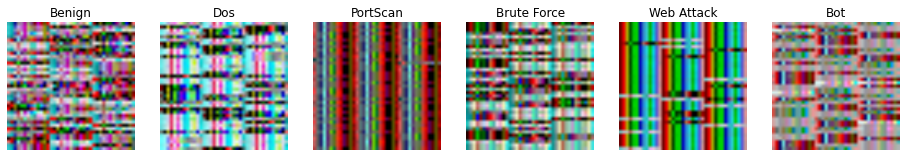

In [63]:
benign = "Images/Train_224x224/Benign/"
dos = "Images/Train_224x224/DoS/"
portscan = "Images/Train_224x224/PortScan/"
bruteforce = "Images/Train_224x224/BruteForce/"
webattack = "Images/Train_224x224/WebAttack/"
bot = "Images/Train_224x224/Bot/"

benign_images = [os.path.join(benign, filename) for filename in os.listdir(benign) if filename.endswith(".png")]
dos_images = [os.path.join(dos, filename) for filename in os.listdir(dos) if filename.endswith(".png")]
portscan_images = [os.path.join(portscan, filename) for filename in os.listdir(portscan) if filename.endswith(".png")]
bruteforce_images = [os.path.join(bruteforce, filename) for filename in os.listdir(bruteforce) if filename.endswith(".png")]
webattack_images = [os.path.join(webattack, filename) for filename in os.listdir(webattack) if filename.endswith(".png")]
bot_images = [os.path.join(bot, filename) for filename in os.listdir(bot) if filename.endswith(".png")]

random_image1 = random.choice(benign_images)
random_image2 = random.choice(dos_images)
random_image3 = random.choice(portscan_images)
random_image4 = random.choice(bruteforce_images)
random_image5 = random.choice(webattack_images)
random_image6 = random.choice(bot_images)

plt.figure(figsize=(16, 16))
plt.subplot(1, 6, 1)
image1 = Image.open(random_image1)
plt.imshow(image1)
plt.title("Benign")
plt.axis("off")

plt.subplot(1, 6, 2)
image2 = Image.open(random_image2)
plt.imshow(image2)
plt.title("Dos")
plt.axis("off")

plt.subplot(1, 6, 3)
image3 = Image.open(random_image3)
plt.imshow(image3)
plt.title("PortScan")
plt.axis("off")

plt.subplot(1, 6, 4)
image4 = Image.open(random_image4)
plt.imshow(image4)
plt.title("Brute Force")
plt.axis("off")

plt.subplot(1, 6, 5)
image5 = Image.open(random_image5)
plt.imshow(image5)
plt.title("Web Attack")
plt.axis("off")

plt.subplot(1, 6, 6)
image6 = Image.open(random_image6)
plt.imshow(image6)
plt.title("Bot")
plt.axis("off")

plt.show()